In [520]:
# ISMET OKAN CELIK CWID:10472265

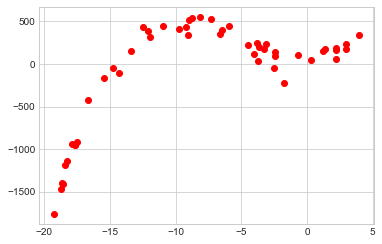

In [521]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 7 * x + 15 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

In [522]:
x=[row[0] for row in x]
y=[row[0] for row in y]
def polyfunc(M):
    curve=np.polyfit(x,y,M)
    poly=np.poly1d(curve)
    new_y=[]
    for i in x:
        y_update=poly(i)
        new_y.append(y_update)
    return new_y

In [523]:
def plotting_func(M):
    ax=plt.subplot()
    ax.plot(x,y,'ro',label='Data')
    ax.plot(x,polyfunc(M),'o',label='Polygon',color='g')
    plt.title('M =' + str(M))
    plt.xlabel('x Values')
    plt.ylabel('y Values')
    plt.legend()
    plt.show()

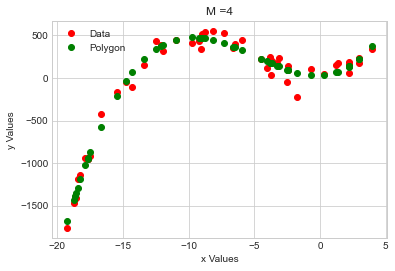

In [524]:
plotting_func(4)

In [525]:
num_of_genes = 4

In [526]:
#Randomly Generating 100 Chromosome
def generate_population(n):
    chromosom_list=[]
    for i in range(n):
        chromosome = np.random.randint(low=0, high=25, size=num_of_genes)
        chromosom_list.append(chromosome)
    return chromosom_list
chromosom_list=generate_population(100)

In [527]:
# Badness Score
def badness_score(chromosom_list):
    mse=[]
    for gene in chromosom_list:
        poly = np.poly1d(gene)
        n=len(x)
        y_prediction=[]
        for a in x:
            y=poly(a)
            y_prediction.append(y)
        mse_calculation=((y-y_prediction)**2)/n
        mse.append(mse_calculation)
        
    MSE_list=[]
    for i in mse:
        b=sum(i)
        MSE_list.append(b)
    return MSE_list       

error_values=badness_score(chromosom_list)

In [528]:
#Choosing Best Chromosomes
def best_chromosomes_list(chromosom_list,error_values,n_best):
    shorted_errors=np.sort(error_values)
    smallest_n_errors=shorted_errors[:n_best]
    
    best_chromosome_index_numbers=[]
    for i in smallest_n_errors:
        index_value=error_values.index(i)
        best_chromosome_index_numbers.append(index_value)

    best_chromosomes=[]
    for i in best_chromosome_index_numbers:
        best_chromosomes.append(chromosom_list[i])

    return best_chromosomes
best_chromosomes=best_chromosomes_list(chromosom_list,error_values,10)

In [529]:
# Randomly Picked Single Point Crossover Operation
def crossover(best_chromosomes,crossoverRate=1):
    cross_over_genes=[]
    for l in range(0,len(best_chromosomes),2):
        if (np.random.uniform(0.0, 1.0) <= crossoverRate):
            a=best_chromosomes[l]
            b=best_chromosomes[l+1]
            random_element =np.random.randint(low = 0, high= 4)
            a1=a[:random_element]
            a2=a[random_element:]
            b1=b[random_element:]
            b2=b[:random_element]
            offspring1=[]
            offspring2=[]
            for i in range(len(a1)):
                offspring1.append(a1[i])
                offspring2.append(b2[i])
            for k in range(len(b1)):
                offspring1.append(b1[k])
                offspring2.append(a2[k])
            cross_over_genes.append(offspring1)
            cross_over_genes.append(offspring2)
    return cross_over_genes

In [530]:
def mutation(best_chromosomes,mutationRate):
    mutated_chromosomes=[]
    for gene in best_chromosomes:
        if (np.random.uniform(0.0, 1.0) <= mutationRate):
            new_gene=gene
            #Picking a random element in the gene
            random_element =np.random.randint(low = 0, high= 4)     
            #Mutation operation--Multiplying Random Element with Random Floating Number
            mutated_gene = new_gene[random_element] *  np.random.uniform(0.0, 2.0)
            new_gene[random_element]=mutated_gene     
            mutated_chromosomes.append(new_gene)
    return mutated_chromosomes     

In [531]:
def generation(iteration,n_population,mutationRate=0.1, crossoverRate=1):
    population=generate_population(n_population)
    
    
    for i in range(iteration):
        MSE=badness_score(population)
        
        #Picking n_best chromosomes
        n_best=10
        best_chromosomes=(best_chromosomes_list(population,MSE,n_best))
        population=[]
        #Generation
        for i in best_chromosomes:
            population.append(i)
        
        cross_over=crossover(best_chromosomes,crossoverRate=1)
        for i in cross_over:
            population.append(i)
        
        mutated_offsprings=mutation(cross_over,mutationRate)
        for i in mutated_offsprings:
            population.append(i)
        
#     MSE_new=badness_score(new_chromosomes)
#     best_new_gene=best_chromosomes_list(new_chromosomes,MSE_new,1)
        return population

In [532]:
ga=generation(500,100,mutationRate=0.1,crossoverRate=1)

In [533]:
#Best Gene Choosen Among the Newly Generated Genes
error=badness_score(ga[0])
best=best_chromosomes_list(ga,error,1)
best[0]

array([ 1, 17, 23, 14])

In [534]:
poly = np.poly1d(best[0])
prediction=[]
for a in x:
    y_new=poly(a)
    prediction.append(y_new) 

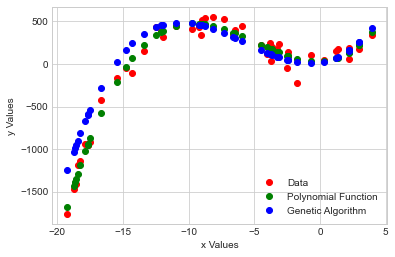

In [536]:
ax=plt.subplot()
ax.plot(x,y,'ro',label='Data')
ax.plot(x,polyfunc(4),'o',label='Polynomial Function',color='g')
ax.plot(x,prediction,'o',label='Genetic Algorithm',color='b')
plt.xlabel('x Values')
plt.ylabel('y Values')
plt.legend()
plt.show()

As we can see Genetic Algorithm performs similarly to Polynomial Function in this graph. Polynomial Function fits the best fit to given data points. However, GA start to make search for the solution and there is a possibility, it may not converge. If there is a mutation operation, it may converge at the end, but it may take a long time.There is no guarantee to reach to the optimality or desired solution. If we run the same algorithm few times than we can see how different solution it may give. When we randomly initialize the population, if the genes are close to the actual solution, then it will converge fast to reach the optimum solution. Still, when we initialize the population, if the genes in the population are not close to the actual solution, then it will take time to converge to find good solution.